## Задание 1
Вычислить  $f = 21b^2 - 2a^2 + 44b^4 - 10a^2b^2 + \frac{a}{2b}$ при $a = 77617$ и $b = 33096$.

In [56]:
a = 77617
b = 33096
f = 2*b * (21*b**2 - 2*a**2 + 44*b**4 - 10*a**2*b**2) + a
print('Эталон:',f//(2*b), '+', f%(2*b)/(2*b))

Эталон: -13197592564354953217 + 0.17260394005317864


## float

In [57]:
a_f = 77617
b_f = 33096
f_f = (1+5*b_f**2) * (88*b_f**2-20*a_f**2)/10 + 122*b_f**2/10
print(f'{f_f:.10f}')
print(f_f-f//(2*b))

-13197592564354953216.0000000000
0.0


In [58]:
t = -13197592564354953217+0.17260394005317864
print(f'{t:.10f}')

-13197592564354953216.0000000000


## Задание 2
Вычислить собственные значения матрицы $\mathbf{A}$ аналитически и средствами MATLAB. Отобразить результат на комплексной плоскости.
\begin{equation} \nonumber
	\mathbf{A} = 
	\begin{pmatrix}
		1 & 0 & \cdots & \cdots & 0 & 10^{-2m} \\
		1 & 1 & \ddots &  &  & 0 \\
		0 & 1 & \ddots &  \ddots &  & \vdots \\
		\vdots &  & \ddots & \ddots & \ddots & \vdots \\
		\vdots &  &  & \ddots & \ddots & 0 \\
		0 & \cdots & \cdots &  \cdots & 1 & 1 \\
	\end{pmatrix}_{2m \times 2m}
\end{equation}

### Аналитическое решение 

$\Large |A| = 1 - 10^{-2m}$

$\Large |A-{\lambda}E|$ = $(1-{\lambda})^{2m}-10^{-2m} = 0$

$\Large {1-\lambda} $ = $\sqrt[2m]{10^{-2m}}$

$\Large \lambda = 1 - \sqrt[2m]{10^{-2m}}$

$\Large \lambda_k$ = $ 1 - 0.1 * (cos(\frac{2\pi*k}{2m}) + i * sin(\frac{2\pi*k}{2m})) $ 

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def lambda_k(k,m):
    return 1 - 0.1*(np.cos((2*np.pi*k)/(2*m)) + 1j*np.sin((2*np.pi*k)/(2*m)))

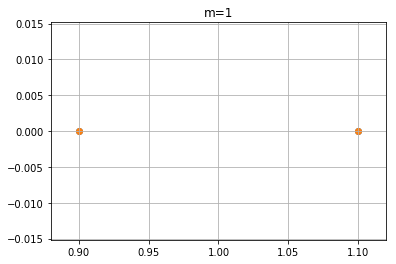

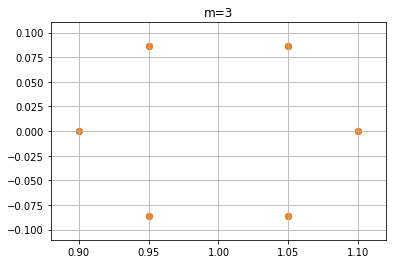

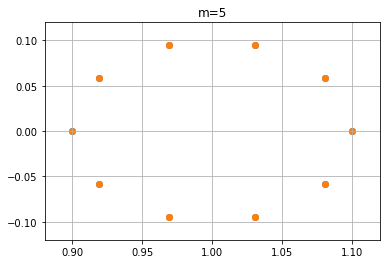

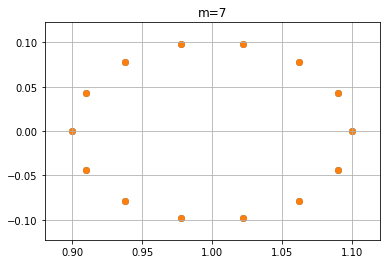

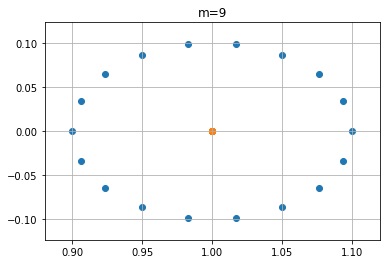

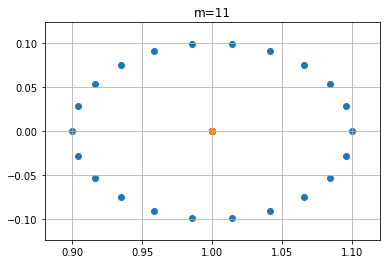

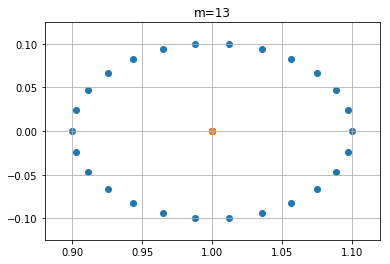

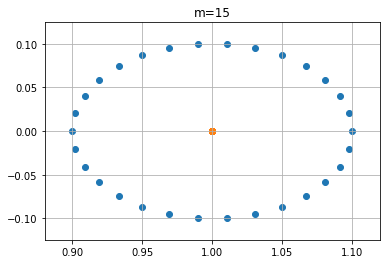

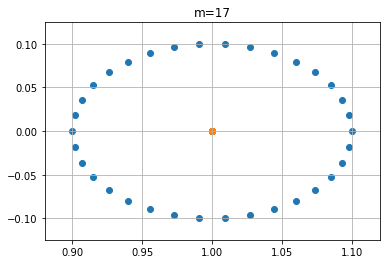

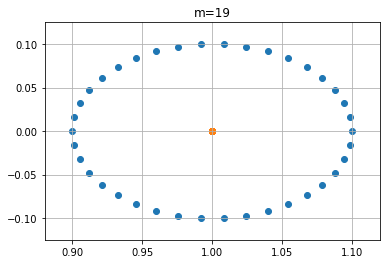

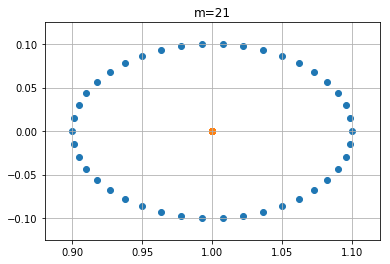

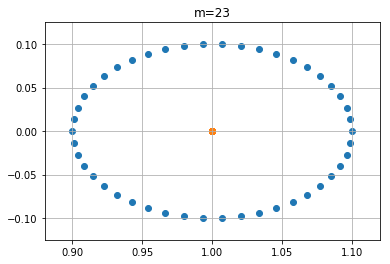

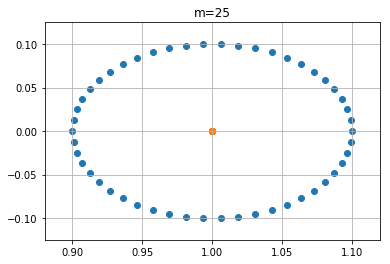

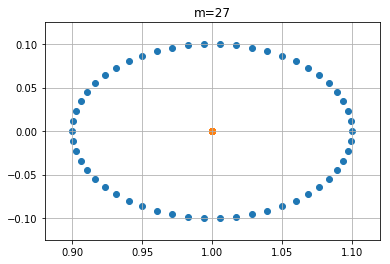

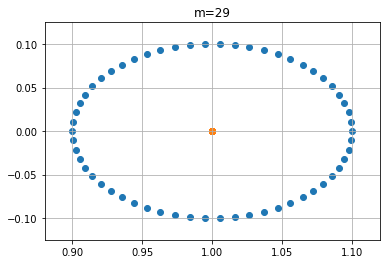

In [73]:
for m in range(1,30,2):
    plt.figure()
    plt.title('m='+str(m))
    roots = [lambda_k(i,m) for i in range(2*m)]
    plt.scatter([t.real for t in roots],[t.imag for t in roots])
    plt.grid()
    A=np.eye(2*m, dtype = np.float64) + np.eye(2*m,k = -1,dtype = np.float64)
    A[0][-1]=10.0**(-2*m)
    plt.scatter([t.real for t in np.linalg.eigvals(A)],[t.imag for t in np.linalg.eigvals(A)])

## Задание 3
Получить формулу Симпсона из формулы трапеций с помощью однократного сгущения сетки в 2 раза и формулы Ричардсона.

## Задание 4
Вычислить интеграл 
$\int_{0}^{1} \frac{4}{1 + x^2} dx$
численно по формуле трапеций при числе интервалов сетки $N = 16,32,64,128,256$. Затем с помощью формулы  или формулы  построить график эффективного порядка. Провести уточнение решения по формуле Ричардсона, получив из 5 расчетных значений 4 уточненных. По уточненным значениям вновь построить график эффективного порядка.

In [156]:
from math import log
def f(x):
    return 4/(1+x**2)
def simple_int(f,a,b,N):
    x = np.linspace(a,b,N+1)
    answer = 0
    for i in range(N):
        answer += (f(x[i])+f(x[i+1]))*(x[i+1]-x[i])/2
    return answer
def effective_p(U2,U1,U0,r):
    return log((U2-U1)/(U1-U0),r)

In [158]:
N = [2**t for t in range(4,9)]
int_values = [simple_int(f,0,1,t) for t in N]
int_values

[3.140941612041389,
 3.141429893174974,
 3.141551963485656,
 3.141582481063752,
 3.1415901104582806]

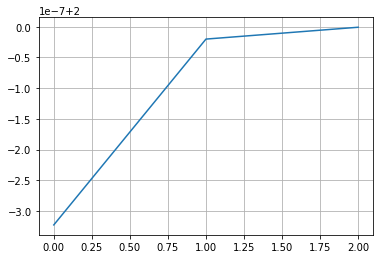

In [159]:
effective_p_values = [effective_p(int_values[i], int_values[i-1], int_values[i-2],1/2) for i in range(2,len(int_values))]
plt.plot(effective_p_values)
plt.grid()

In [160]:
def richardson_thickening(U1,U0,r,p):
    return (r**(-p)*U1-U0)/(r**(-p)-1)

In [161]:
effective_p_values.append(2)

In [162]:
richardson_thickening_vals = [richardson_thickening(int_values[i],int_values[i-1],1/2,2) for i in range(1,len(int_values))]
richardson_thickening_vals

[3.1415926535528356, 3.1415926535892162, 3.1415926535897842, 3.14159265358979]

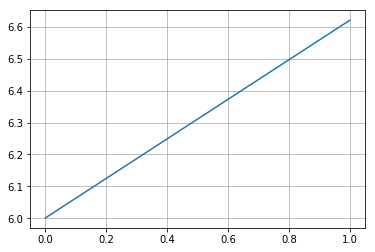

In [163]:
effective_p_values = [effective_p(richardson_thickening_vals[i], richardson_thickening_vals[i-1], richardson_thickening_vals[i-2],1/2) for i in range(2,len(richardson_thickening_vals))]
plt.plot(effective_p_values)
plt.grid()

## Задание 5
Вычислить интеграл 
\begin{equation} \nonumber
	\int_{0}^{1} \frac{1}{2 \sqrt{x}} dx
\end{equation}
по формуле средних прямоугольников при тех же $N$. Определить эффективный порядок, провести уточнение по Эйткену (получив 3 уточненных значения), вновь определить эффективный порядок. После этого провести еще одно уточнение решения по Эйткену и сравнить полученный результат с точным значением интеграла.

In [164]:
def simple_int1(f,a,b,N):
    x = np.linspace(a,b,N+1)
    answer = 0
    for i in range(N):
        answer += f((x[i+1]+x[i])/2)*(x[i+1]-x[i])
    return answer
def f1(x):
    return 1/(2*np.sqrt(x))

In [165]:
N = [2**t for t in range(4,9)]
int_values = [simple_int1(f1,0,1,t) for t in N]
int_values

[0.9244283423198689,
 0.9465441798531917,
 0.9621963778497564,
 0.9732676399852601,
 0.9810970763385279]

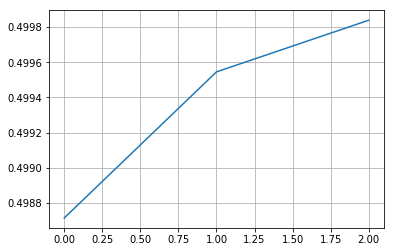

In [166]:
effective_p_values = [effective_p(int_values[i], int_values[i-1], int_values[i-2],1/2) for i in range(2,len(int_values))]
plt.plot(effective_p_values)
plt.grid()

In [167]:
def eitken_thickening(U2,U1,U0,r):
    return U2+(U2-U1)/((U1-U0)/(U2-U1)-1)

In [168]:
eitken_vals = [eitken_thickening(int_values[i],int_values[i-1],int_values[i-2],1/2) for i in range(2,len(int_values))]
eitken_vals

[1.0000993736357098, 1.000024802493239, 1.0000061966082772]

In [169]:
effective_p_values = [effective_p(eitken_vals[i], eitken_vals[i-1], eitken_vals[i-2],1/2) for i in range(2,len(eitken_vals))]
effective_p_values

[2.00285843278743]

In [170]:
eitken_vals1 = [eitken_thickening(eitken_vals[i], eitken_vals[i-1], eitken_vals[i-2],1/2) for i in range(2,len(eitken_vals))]
eitken_vals1

[1.0000000110036606]